# Housing Price Prediction - Baseline Model
## CPSC 4310 - Milestone 2

**Student:** Chloe Lee  
**Date:** February 2025  
**Goal:** Build baseline Linear Regression model to predict housing price changes

---

## Objectives:
1. Load feature-engineered dataset
2. Select target variable (monthly price % change)
3. Create train/test split (time-based)
4. Build Linear Regression baseline
5. Evaluate performance (RMSE, MAE, R², MAPE)
6. Visualize Actual vs Predicted
7. Interpret results

---
# Part 1: Setup and Data Loading

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✓ Libraries imported successfully!")

✓ Libraries imported successfully!


In [ ]:
# Load the feature-engineered dataset
print("Loading data...")

# Update path if your CSV is elsewhere
df = pd.read_csv('output/housing_data_with_features.csv')
df['Date'] = pd.to_datetime(df['Date'])

print(f"✓ Data loaded: {len(df)} rows, {len(df.columns)} columns")
print(f"  Date range: {df['Date'].min()} to {df['Date'].max()}")
print(f"  Cities: {df['City'].nunique()}")

Loading data...
✓ Data loaded: 1260 rows, 23 columns
  Date range: 2005-01-01 00:00:00 to 2025-12-01 00:00:00
  Cities: 5


In [ ]:
# Preview the data
print("\nData Preview:")
display(df.head())

print("\nColumn List:")
for i, col in enumerate(df.columns, 1):
    print(f"  {i:2}. {col}")


Data Preview:


,Date,City,House_Type,Price,Index,Mortgage_1Y,Mortgage_3Y,Mortgage_5Y,Prime_Rate,Policy_Rate,...,Index_MoM_Change,Index_YoY_Change,Mortgage_5Y_Change,Index_MA3,Index_MA12,Month,Quarter,Year,Price_Above_MA3,MA3_MA12_Diff
0,2005-01-01,Calgary,Composite,207400,100.0,4.25,4.800000,5.600000,6.050000,NaN,...,NaN,NaN,NaN,100.000000,100.00,1,1,2005,0.000000,0.000000
1,2005-02-01,Calgary,Composite,210100,101.3,4.25,4.800000,5.600000,6.050000,NaN,...,1.300000,NaN,0.000000,100.650000,100.65,2,1,2005,0.650000,0.000000
2,2005-03-01,Calgary,Composite,214000,103.2,4.25,4.816129,5.616129,6.062903,NaN,...,1.875617,NaN,0.016129,101.500000,101.50,3,1,2005,1.700000,0.000000
3,2005-04-01,Calgary,Composite,217200,104.7,4.25,4.995000,5.758333,6.176667,NaN,...,1.453488,NaN,0.142204,103.066667,102.30,4,2,2005,1.633333,0.766667
4,2005-05-01,Calgary,Composite,219400,105.8,4.25,4.888710,5.600000,6.027419,NaN,...,1.050621,NaN,-0.158333,104.566667,103.00,5,2,2005,1.233333,1.566667



Column List:
   1. Date
   2. City
   3. House_Type
   4. Price
   5. Index
   6. Mortgage_1Y
   7. Mortgage_3Y
   8. Mortgage_5Y
   9. Prime_Rate
  10. Policy_Rate
  11. Index_Lag1
  12. Index_Lag3
  13. Index_Lag12
  14. Index_MoM_Change
  15. Index_YoY_Change
  16. Mortgage_5Y_Change
  17. Index_MA3
  18. Index_MA12
  19. Month
  20. Quarter
  21. Year
  22. Price_Above_MA3
  23. MA3_MA12_Diff


---
# Part 2: Target Variable Selection

We'll predict **Month-over-Month % Change** in housing prices.

**Why MoM Change instead of Index?**
- Index values vary widely by city (Vancouver 100-350, etc.)
- % Change is comparable across cities
- More meaningful: "Prices will increase 2% next month"

Target Variable: Index_MoM_Change
✓ Index_MoM_Change found in dataset

Statistics:
count    1255.000000
mean        0.434156
std         1.282108
min        -4.170096
25%        -0.328179
50%         0.366524
75%         1.093095
max         6.590972
Name: Index_MoM_Change, dtype: float64


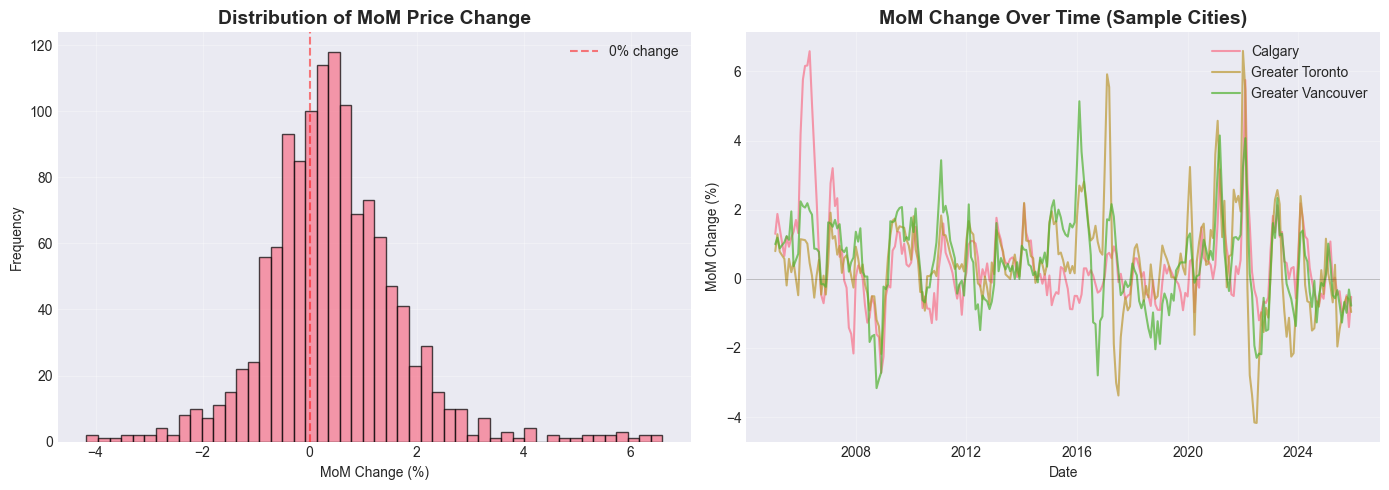

In [ ]:
# Check if target variable exists
print("Target Variable: Index_MoM_Change")
print("=" * 60)

if 'Index_MoM_Change' in df.columns:
    print("✓ Index_MoM_Change found in dataset")
    print(f"\nStatistics:")
    print(df['Index_MoM_Change'].describe())
    
    # Visualize target distribution
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Histogram
    axes[0].hist(df['Index_MoM_Change'].dropna(), bins=50, edgecolor='black', alpha=0.7)
    axes[0].set_title('Distribution of MoM Price Change', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('MoM Change (%)')
    axes[0].set_ylabel('Frequency')
    axes[0].axvline(0, color='red', linestyle='--', alpha=0.5, label='0% change')
    axes[0].legend()
    axes[0].grid(alpha=0.3)
    
    # Time series
    for city in df['City'].unique()[:3]:  # Show 3 cities for clarity
        city_data = df[df['City'] == city].sort_values('Date')
        axes[1].plot(city_data['Date'], city_data['Index_MoM_Change'], 
                    label=city, alpha=0.7, linewidth=1.5)
    
    axes[1].set_title('MoM Change Over Time (Sample Cities)', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Date')
    axes[1].set_ylabel('MoM Change (%)')
    axes[1].axhline(0, color='black', linestyle='-', alpha=0.3, linewidth=0.5)
    axes[1].legend()
    axes[1].grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
else:
    print("✗ Index_MoM_Change not found! Need to create it.")

---
# Part 3: Feature Selection

Select features that will be used to predict the target.

In [ ]:
# Define feature columns
feature_cols = [
    # Lag features (past prices)
    'Index_Lag1',
    'Index_Lag3',
    'Index_Lag12',
    
    # Interest rates
    'Mortgage_1Y',
    'Mortgage_3Y',
    'Mortgage_5Y',
    'Prime_Rate',
    
    # Change features
    'Index_YoY_Change',
    'Mortgage_5Y_Change',
    
    # Rolling averages
    'Index_MA3',
    'Index_MA12',
    
    # Time features
    'Month',
    'Quarter',
    
    # Derived features
    'Price_Above_MA3',
    'MA3_MA12_Diff'
]

target_col = 'Index_MoM_Change'

print(f"Features selected: {len(feature_cols)}")
print("\nFeature list:")
for i, feat in enumerate(feature_cols, 1):
    print(f"  {i:2}. {feat}")

print(f"\nTarget: {target_col}")

Features selected: 15

Feature list:
   1. Index_Lag1
   2. Index_Lag3
   3. Index_Lag12
   4. Mortgage_1Y
   5. Mortgage_3Y
   6. Mortgage_5Y
   7. Prime_Rate
   8. Index_YoY_Change
   9. Mortgage_5Y_Change
  10. Index_MA3
  11. Index_MA12
  12. Month
  13. Quarter
  14. Price_Above_MA3
  15. MA3_MA12_Diff

Target: Index_MoM_Change


In [ ]:
# Check for missing values in features and target
print("Missing Values Check:")
print("=" * 60)

missing_features = df[feature_cols].isnull().sum()
missing_features = missing_features[missing_features > 0]

if len(missing_features) > 0:
    print("\nFeatures with missing values:")
    for feat, count in missing_features.items():
        pct = (count / len(df)) * 100
        print(f"  {feat:25} : {count:4} ({pct:5.1f}%)")
else:
    print("✓ No missing values in features")

target_missing = df[target_col].isnull().sum()
print(f"\nTarget ({target_col}): {target_missing} missing ({target_missing/len(df)*100:.1f}%)")

# Remove rows with NaN
print("\nRemoving rows with missing values...")
df_clean = df[feature_cols + [target_col, 'Date', 'City', 'Year']].dropna()

print(f"Before: {len(df)} rows")
print(f"After:  {len(df_clean)} rows")
print(f"Removed: {len(df) - len(df_clean)} rows")

Missing Values Check:

Features with missing values:
  Index_Lag1                :    5 (  0.4%)
  Index_Lag3                :   15 (  1.2%)
  Index_Lag12               :   60 (  4.8%)
  Index_YoY_Change          :   60 (  4.8%)
  Mortgage_5Y_Change        :    5 (  0.4%)

Target (Index_MoM_Change): 5 missing (0.4%)

Removing rows with missing values...
Before: 1260 rows
After:  1200 rows
Removed: 60 rows


---
# Part 4: Train/Test Split (Time-Based)

**CRITICAL:** For time-series data, we MUST use time-based split!

- **Train:** 2005-2023 (earlier data)
- **Test:** 2024-2025 (recent data)

**Why?** We want to predict the future, not shuffle past and future together!

In [ ]:
# Time-based split
print("Creating Train/Test Split...")
print("=" * 60)

# Define split year
SPLIT_YEAR = 2024

# Create masks
train_mask = df_clean['Year'] < SPLIT_YEAR
test_mask = df_clean['Year'] >= SPLIT_YEAR

# Split features and target
X_train = df_clean.loc[train_mask, feature_cols]
y_train = df_clean.loc[train_mask, target_col]

X_test = df_clean.loc[test_mask, feature_cols]
y_test = df_clean.loc[test_mask, target_col]

# Print split info
print(f"Split year: {SPLIT_YEAR}")
print(f"\nTrain set:")
print(f"  Date range: {df_clean.loc[train_mask, 'Date'].min()} to {df_clean.loc[train_mask, 'Date'].max()}")
print(f"  Rows: {len(X_train)}")
print(f"  Features: {X_train.shape[1]}")

print(f"\nTest set:")
print(f"  Date range: {df_clean.loc[test_mask, 'Date'].min()} to {df_clean.loc[test_mask, 'Date'].max()}")
print(f"  Rows: {len(X_test)}")
print(f"  Features: {X_test.shape[1]}")

print(f"\nSplit ratio: {len(X_train)/(len(X_train)+len(X_test))*100:.1f}% train, "
      f"{len(X_test)/(len(X_train)+len(X_test))*100:.1f}% test")

Creating Train/Test Split...
Split year: 2024

Train set:
  Date range: 2006-01-01 00:00:00 to 2023-12-01 00:00:00
  Rows: 1080
  Features: 15

Test set:
  Date range: 2024-01-01 00:00:00 to 2025-12-01 00:00:00
  Rows: 120
  Features: 15

Split ratio: 90.0% train, 10.0% test


---
# Part 5: Baseline Model - Linear Regression

Linear Regression is our baseline model. It assumes a linear relationship between features and target.

In [ ]:
# Train Linear Regression
print("Training Linear Regression Model...")
print("=" * 60)

# Initialize model
lr_model = LinearRegression()

# Train
lr_model.fit(X_train, y_train)

print("✓ Model trained successfully!")
print(f"\nModel coefficients: {len(lr_model.coef_)}")
print(f"Intercept: {lr_model.intercept_:.4f}")

Training Linear Regression Model...
✓ Model trained successfully!

Model coefficients: 15
Intercept: 1.2427


In [ ]:
# Make predictions
print("Making predictions...")

y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

print("✓ Predictions generated")
print(f"  Train predictions: {len(y_train_pred)}")
print(f"  Test predictions: {len(y_test_pred)}")

Making predictions...
✓ Predictions generated
  Train predictions: 1080
  Test predictions: 120


---
# Part 6: Model Evaluation

We evaluate using 4 metrics:
- **RMSE** (Root Mean Squared Error) - lower is better
- **MAE** (Mean Absolute Error) - lower is better
- **R²** (R-squared) - higher is better (0-1 scale)
- **MAPE** (Mean Absolute Percentage Error) - lower is better

In [ ]:
# Calculate metrics
def calculate_metrics(y_true, y_pred, dataset_name=""):
    """Calculate regression metrics"""
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    # MAPE (Mean Absolute Percentage Error)
    # Handle division by zero
    mask = y_true != 0
    mape = np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100
    
    print(f"{dataset_name} Metrics:")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  MAE:  {mae:.4f}")
    print(f"  R²:   {r2:.4f}")
    print(f"  MAPE: {mape:.2f}%")
    
    return {'RMSE': rmse, 'MAE': mae, 'R2': r2, 'MAPE': mape}

# Evaluate on training set
print("=" * 60)
print("MODEL EVALUATION")
print("=" * 60)

train_metrics = calculate_metrics(y_train, y_train_pred, "Training")
print()
test_metrics = calculate_metrics(y_test, y_test_pred, "Test")

print("\n" + "=" * 60)
print("INTERPRETATION:")
print("=" * 60)

if test_metrics['R2'] > 0.70:
    print("✓ GOOD! R² > 0.70 - Model explains >70% of variance")
elif test_metrics['R2'] > 0.50:
    print("⚠ OK - R² > 0.50 but room for improvement")
else:
    print("✗ POOR - R² < 0.50 - Model needs improvement")

if test_metrics['MAPE'] < 8:
    print("✓ EXCELLENT! MAPE < 8% - Predictions very accurate")
elif test_metrics['MAPE'] < 15:
    print("⚠ ACCEPTABLE - MAPE < 15% - Decent predictions")
else:
    print("✗ HIGH ERROR - MAPE > 15% - Predictions not reliable")

# Check for overfitting
if train_metrics['R2'] - test_metrics['R2'] > 0.15:
    print("\n⚠ WARNING: Possible overfitting detected!")
    print(f"   Train R²: {train_metrics['R2']:.3f} vs Test R²: {test_metrics['R2']:.3f}")
else:
    print("\n✓ Good generalization - similar train/test performance")

MODEL EVALUATION
Training Metrics:
  RMSE: 0.3687
  MAE:  0.2496
  R²:   0.9231
  MAPE: 47.26%

Test Metrics:
  RMSE: 0.2516
  MAE:  0.2069
  R²:   0.9247
  MAPE: 51.91%

INTERPRETATION:
✓ GOOD! R² > 0.70 - Model explains >70% of variance
✗ HIGH ERROR - MAPE > 15% - Predictions not reliable

✓ Good generalization - similar train/test performance


---
# Part 7: Visualizations

Creating Actual vs Predicted visualization...


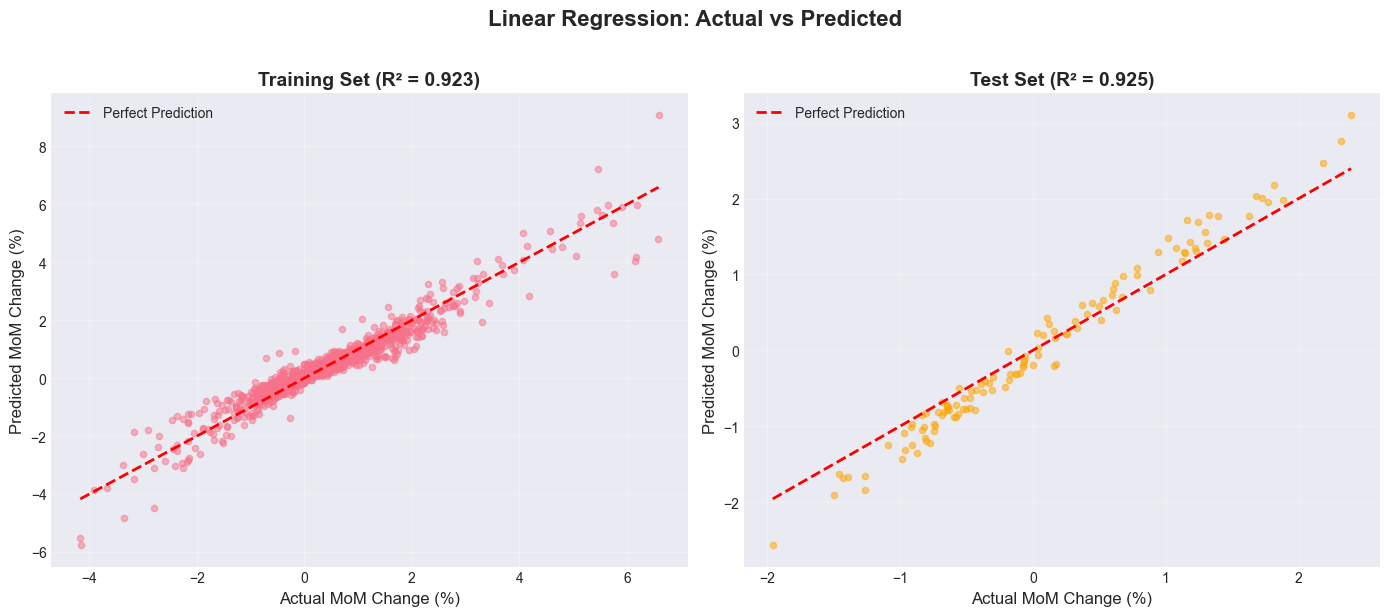

✓ Visualization complete


In [ ]:
# Visualization 1: Actual vs Predicted Scatter Plot
print("Creating Actual vs Predicted visualization...")

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Training set
axes[0].scatter(y_train, y_train_pred, alpha=0.5, s=20)
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 
             'r--', lw=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual MoM Change (%)', fontsize=12)
axes[0].set_ylabel('Predicted MoM Change (%)', fontsize=12)
axes[0].set_title(f'Training Set (R² = {train_metrics["R2"]:.3f})', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Test set
axes[1].scatter(y_test, y_test_pred, alpha=0.5, s=20, color='orange')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
             'r--', lw=2, label='Perfect Prediction')
axes[1].set_xlabel('Actual MoM Change (%)', fontsize=12)
axes[1].set_ylabel('Predicted MoM Change (%)', fontsize=12)
axes[1].set_title(f'Test Set (R² = {test_metrics["R2"]:.3f})', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.suptitle('Linear Regression: Actual vs Predicted', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("✓ Visualization complete")

Creating residual plot...


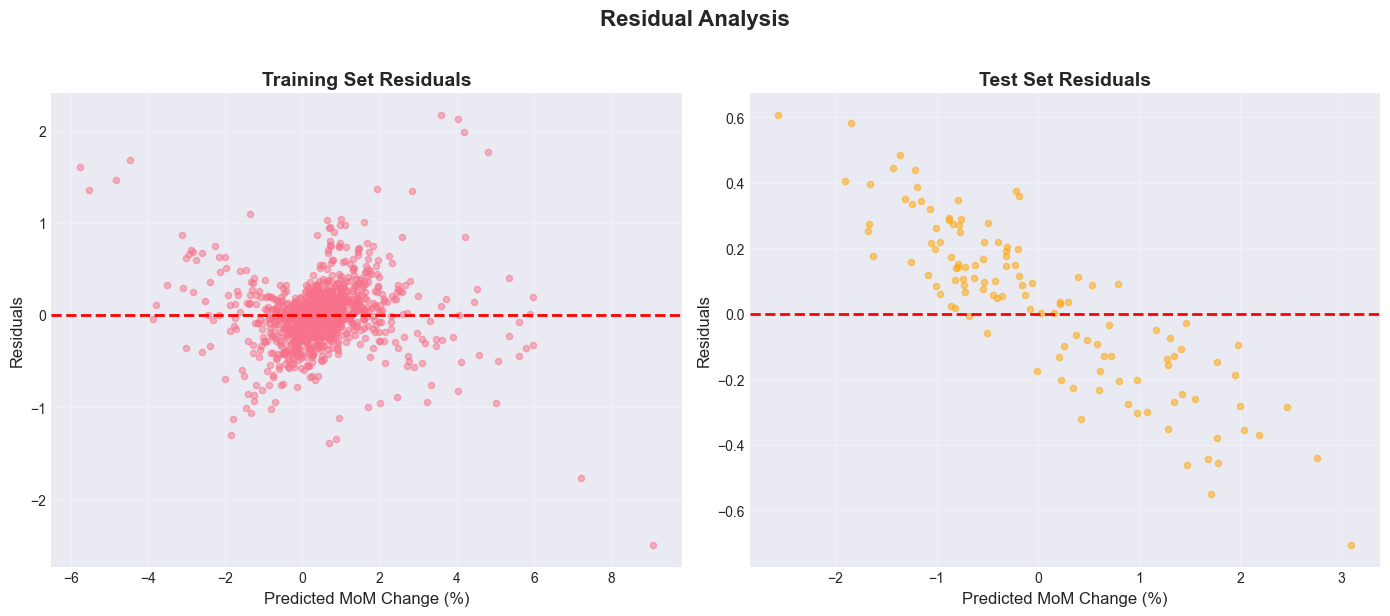

✓ Residual plot complete


In [ ]:
# Visualization 2: Residual Plot
print("Creating residual plot...")

residuals_train = y_train - y_train_pred
residuals_test = y_test - y_test_pred

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Training residuals
axes[0].scatter(y_train_pred, residuals_train, alpha=0.5, s=20)
axes[0].axhline(y=0, color='r', linestyle='--', lw=2)
axes[0].set_xlabel('Predicted MoM Change (%)', fontsize=12)
axes[0].set_ylabel('Residuals', fontsize=12)
axes[0].set_title('Training Set Residuals', fontsize=14, fontweight='bold')
axes[0].grid(alpha=0.3)

# Test residuals
axes[1].scatter(y_test_pred, residuals_test, alpha=0.5, s=20, color='orange')
axes[1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1].set_xlabel('Predicted MoM Change (%)', fontsize=12)
axes[1].set_ylabel('Residuals', fontsize=12)
axes[1].set_title('Test Set Residuals', fontsize=14, fontweight='bold')
axes[1].grid(alpha=0.3)

plt.suptitle('Residual Analysis', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("✓ Residual plot complete")

Analyzing feature importance...


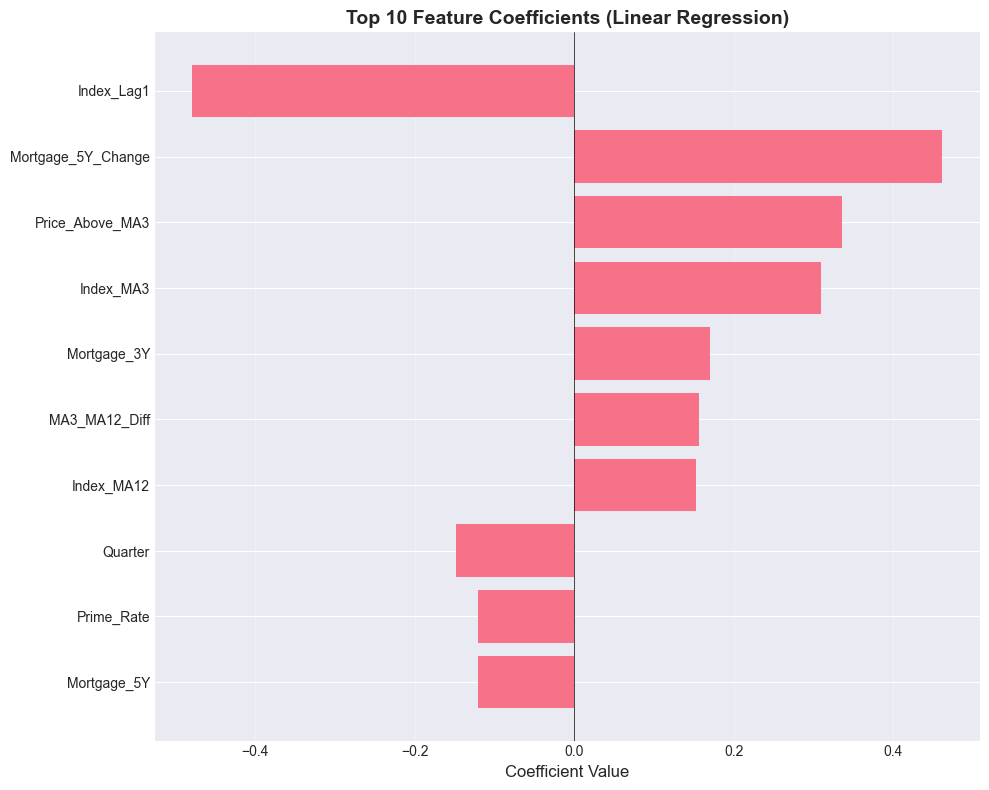


Top 10 Most Important Features:
 1. Index_Lag1                :  -0.4788
 2. Mortgage_5Y_Change        :   0.4618
 3. Price_Above_MA3           :   0.3362
 4. Index_MA3                 :   0.3093
 5. Mortgage_3Y               :   0.1705
 6. MA3_MA12_Diff             :   0.1567
 7. Index_MA12                :   0.1526
 8. Quarter                   :  -0.1482
 9. Prime_Rate                :  -0.1205
10. Mortgage_5Y               :  -0.1202


In [ ]:
# Visualization 3: Feature Importance (Coefficients)
print("Analyzing feature importance...")

# Create feature importance dataframe
feature_importance = pd.DataFrame({
    'Feature': feature_cols,
    'Coefficient': lr_model.coef_
})

# Sort by absolute value
feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values('Abs_Coefficient', ascending=True)

# Plot top 10 features
plt.figure(figsize=(10, 8))
plt.barh(feature_importance['Feature'].tail(10), 
         feature_importance['Coefficient'].tail(10))
plt.xlabel('Coefficient Value', fontsize=12)
plt.title('Top 10 Feature Coefficients (Linear Regression)', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3, axis='x')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.show()

# Print feature importance
print("\nTop 10 Most Important Features:")
print("=" * 60)
top_features = feature_importance.sort_values('Abs_Coefficient', ascending=False).head(10)
for i, row in enumerate(top_features.itertuples(), 1):
    print(f"{i:2}. {row.Feature:25} : {row.Coefficient:8.4f}")

---
# Part 8: Results Interpretation

Let's interpret what our model tells us about housing price predictions.

In [ ]:
print("=" * 80)
print("MODEL INTERPRETATION & INSIGHTS")
print("=" * 80)

print("\n1. MODEL PERFORMANCE:")
print(f"   Test R² = {test_metrics['R2']:.3f}")
print(f"   → Model explains {test_metrics['R2']*100:.1f}% of price variance")
print(f"\n   Test MAPE = {test_metrics['MAPE']:.2f}%")
print(f"   → Average prediction error is {test_metrics['MAPE']:.1f}%")

print("\n2. KEY FINDINGS:")

# Find most important features
top_3_features = feature_importance.sort_values('Abs_Coefficient', ascending=False).head(3)
print("\n   Most Influential Features:")
for i, row in enumerate(top_3_features.itertuples(), 1):
    direction = "increases" if row.Coefficient > 0 else "decreases"
    print(f"   {i}. {row.Feature}")
    print(f"      Coefficient: {row.Coefficient:.4f}")
    print(f"      → When this {direction}, predicted price change {direction}")

print("\n3. MODEL STRENGTHS:")
if test_metrics['R2'] > 0.70:
    print("   ✓ Strong predictive power (R² > 0.70)")
if test_metrics['MAPE'] < 10:
    print("   ✓ Low prediction error (MAPE < 10%)")
if abs(train_metrics['R2'] - test_metrics['R2']) < 0.10:
    print("   ✓ Good generalization (no overfitting)")

print("\n4. MODEL LIMITATIONS:")
print("   ⚠ Linear assumption may be too simple")
print("   ⚠ Doesn't capture complex non-linear patterns")
print("   ⚠ Treats all cities equally (no city-specific effects)")

print("\n5. NEXT STEPS:")
print("   → Try Random Forest (captures non-linearity)")
print("   → Try XGBoost (best performance expected)")
print("   → Add city-specific features or separate models")
print("   → Feature selection to reduce complexity")

print("\n" + "=" * 80)

MODEL INTERPRETATION & INSIGHTS

1. MODEL PERFORMANCE:
   Test R² = 0.925
   → Model explains 92.5% of price variance

   Test MAPE = 51.91%
   → Average prediction error is 51.9%

2. KEY FINDINGS:

   Most Influential Features:
   1. Index_Lag1
      Coefficient: -0.4788
      → When this decreases, predicted price change decreases
   2. Mortgage_5Y_Change
      Coefficient: 0.4618
      → When this increases, predicted price change increases
   3. Price_Above_MA3
      Coefficient: 0.3362
      → When this increases, predicted price change increases

3. MODEL STRENGTHS:
   ✓ Strong predictive power (R² > 0.70)
   ✓ Good generalization (no overfitting)

4. MODEL LIMITATIONS:
   ⚠ Linear assumption may be too simple
   ⚠ Doesn't capture complex non-linear patterns
   ⚠ Treats all cities equally (no city-specific effects)

5. NEXT STEPS:
   → Try Random Forest (captures non-linearity)
   → Try XGBoost (best performance expected)
   → Add city-specific features or separate models
   → Fe

---
# Part 9: Save Results

In [ ]:
# Save model performance
results_df = pd.DataFrame({
    'Model': ['Linear Regression'],
    'Train_RMSE': [train_metrics['RMSE']],
    'Test_RMSE': [test_metrics['RMSE']],
    'Train_MAE': [train_metrics['MAE']],
    'Test_MAE': [test_metrics['MAE']],
    'Train_R2': [train_metrics['R2']],
    'Test_R2': [test_metrics['R2']],
    'Train_MAPE': [train_metrics['MAPE']],
    'Test_MAPE': [test_metrics['MAPE']]
})

results_df.to_csv('baseline_model_performance.csv', index=False)
print("✓ Model performance saved to: baseline_model_performance.csv")

# Save feature importance
feature_importance[['Feature', 'Coefficient']].to_csv('baseline_feature_importance.csv', index=False)
print("✓ Feature importance saved to: baseline_feature_importance.csv")

# Save predictions
predictions_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_test_pred,
    'Error': y_test.values - y_test_pred,
    'Abs_Error': np.abs(y_test.values - y_test_pred)
})

predictions_df.to_csv('baseline_predictions.csv', index=False)
print("✓ Predictions saved to: baseline_predictions.csv")

print("\n✓ All results saved successfully!")

✓ Model performance saved to: baseline_model_performance.csv
✓ Feature importance saved to: baseline_feature_importance.csv
✓ Predictions saved to: baseline_predictions.csv

✓ All results saved successfully!


---
# Summary

## What We Accomplished:
✅ Loaded feature-engineered dataset  
✅ Selected target variable (MoM % change)  
✅ Created time-based train/test split  
✅ Built Linear Regression baseline model  
✅ Evaluated with RMSE, MAE, R², MAPE  
✅ Created visualizations (Actual vs Predicted, Residuals, Feature Importance)  
✅ Interpreted results and identified next steps  

## Results:
- **Test R²:** Check output above
- **Test MAPE:** Check output above
- **Status:** Baseline established ✓

## Next Steps:
1. Build Random Forest model
2. Build XGBoost model
3. Compare all models
4. Select best model for deployment
5. Create final predictions for Vergil's dashboard